In [12]:
# Basic Libraries
import os
import cv2
import json
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from scipy.stats import loguniform
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data_category = data[['OverTime', 'TrainingTimesLastYear', 'StockOptionLevel', 'RelationshipSatisfaction', 'JobSatisfaction', 'JobRole', 'JobInvolvement', 'EnvironmentSatisfaction', 'Department', 'BusinessTravel', 'Education', 'EducationField', 'Gender', 'MaritalStatus', 'JobLevel', 'Attrition', 'PerformanceRating', 'WorkLifeBalance']]
data_numeric = data[['PercentSalaryHike', 'MonthlyRate', 'HourlyRate', 'Age', 'DailyRate', 'DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome']]

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.308955,0.308955
1,0.435465,0.126510
2,0.516809,0.081345
3,0.597458,0.080648
4,0.674927,0.077469
5,0.748481,0.073554
6,0.819609,0.071128
7,0.875543,0.055934
8,0.916377,0.040834
9,0.952554,0.036177


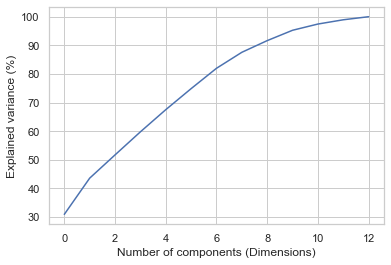

None

In [7]:
sc = StandardScaler()
data_numeric_scaled = sc.fit_transform(data_numeric)

pca = PCA(n_components=None)
pca.fit(data_numeric_scaled)

evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(20))

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
display(plt.show())

In [8]:
pca = PCA(n_components=9)
data_numeric_pca = pca.fit_transform(data_numeric_scaled)
data_numeric_pca = pd.DataFrame(data_numeric_pca)
print(data_numeric_pca.head())
print("\nSize: ")
print(data_numeric_pca.shape)

          0         1         2         3         4         5         6  \
0 -0.267489  1.612452 -0.162541 -0.932900 -1.433168  1.012589  0.830271   
1  0.856526 -0.365852 -0.165184  1.944438  1.237912 -0.673868  1.723922   
2 -2.197847  1.431922  1.408648 -2.193468 -0.517665 -0.216832  0.203104   
3 -0.568928 -0.662374 -0.709002 -0.535495 -0.043174  2.349378  0.139465   
4 -1.567021  0.980320 -1.791146 -0.541636  0.480218  0.104882 -0.434996   

          7         8  
0  1.498483 -0.906336  
1 -0.309550 -0.906684  
2  0.684813  0.239880  
3 -0.014291  0.450256  
4  2.329865 -0.003300  

Size: 
(1470, 9)


In [5]:
one_hots = ['Department', 'EducationField', 'JobRole']
final_dic = {}
for one_hot in one_hots:
    dic = {i+'_'+one_hot:[] for i in data_category[one_hot].unique()}
    for j in data_category[one_hot]:
        for name in dic:
            if name == j:
                dic[name].append(1)
            else:
                dic[name].append(0)
    final_dic.update(dic)
one_hot_df =  pd.DataFrame(final_dic)
data_category = pd.concat([data_category.drop(one_hots, axis=1),one_hot_df], axis=1)

data_category.loc[data_category['Attrition'] == 'Yes','Attrition'] = 1
data_category.loc[data_category['Attrition'] == 'No','Attrition'] = 0

data_category.loc[data_category['Gender'] == 'Male','Gender'] = 1
data_category.loc[data_category['Gender'] == 'Female','Gender'] = 0

data_category.loc[data_category['OverTime'] == 'Yes','OverTime'] = 1
data_category.loc[data_category['OverTime'] == 'No','OverTime'] = 0

data_category.loc[data_category['BusinessTravel'] == 'Non-Travel','BusinessTravel'] = 0
data_category.loc[data_category['BusinessTravel'] == 'Travel_Rarely','BusinessTravel'] = 1
data_category.loc[data_category['BusinessTravel'] == 'Travel_Frequently','BusinessTravel'] = 2 

data_category.loc[data_category['MaritalStatus'] == 'Single','MaritalStatus'] = 0
data_category.loc[data_category['MaritalStatus'] == 'Married','MaritalStatus'] = 1
data_category.loc[data_category['MaritalStatus'] == 'Divorced','MaritalStatus'] = 2 

data_category.head()

,OverTime,TrainingTimesLastYear,StockOptionLevel,RelationshipSatisfaction,JobSatisfaction,JobInvolvement,EnvironmentSatisfaction,BusinessTravel,Education,Gender,...,Human Resources_EducationField,Sales Executive_JobRole,Research Scientist_JobRole,Laboratory Technician_JobRole,Manufacturing Director_JobRole,Healthcare Representative_JobRole,Manager_JobRole,Sales Representative_JobRole,Research Director_JobRole,Human Resources_JobRole
0,1,0,0,1,4,3,2,1,2,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,1,4,2,2,3,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,2,3,2,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0,3,3,3,4,2,4,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,4,2,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data = pd.concat([data_category, data_numeric_pca], axis=1)
data = data.apply(pd.to_numeric)

y = pd.DataFrame(data[["Attrition"]])
X = data.drop(['Attrition'], axis=1)
X = pd.DataFrame(X)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1176, 1) (1176, 41)
Test Set  : (294, 1) (294, 41)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8163265306122449



<AxesSubplot:>

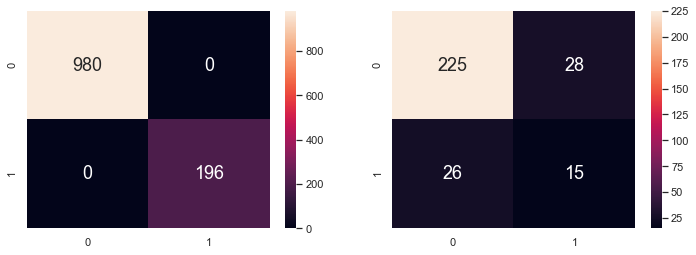

In [14]:
dtc = DecisionTreeClassifier()  # create the decision tree object

# Train the model
dtc.fit(X_train, y_train)

# Predict Legendary values corresponding to Total
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dtc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dtc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [15]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.values.ravel())

print("After OverSampling, Train Set :", y_train.shape, X_train.shape)
print("After OverSampling, Test Set  :", y_test.shape, X_test.shape)
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

After OverSampling, Train Set : (1176, 1) (1176, 41)
After OverSampling, Test Set  : (294, 1) (294, 41)
After OverSampling, counts of label '1': 980
After OverSampling, counts of label '0': 980


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0
Classification F1score  	: 1.0
Classification Precision 	: 1.0
Classification Recall   	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7619047619047619
Classification F1score  	: 0.3636363636363637
Classification Precision 	: 0.2898550724637681
Classification Recall   	: 0.4878048780487805



<AxesSubplot:>

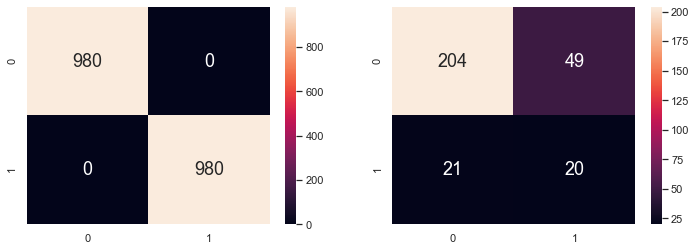

In [17]:
dtc = DecisionTreeClassifier()  # create the decision tree object

# Train the model
dtc.fit(X_train_sm, y_train_sm)

# Predict Legendary values corresponding to Total
y_train_sm_pred = dtc.predict(X_train_sm)
y_test_pred = dtc.predict(X_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_train_sm, y_train_sm_pred)
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dtc.score(X_train_sm, y_train_sm))
print("Classification F1score  \t:", fscore[1])
print("Classification Precision \t:", precision[1])
print("Classification Recall   \t:", recall[1])
print()

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dtc.score(X_test, y_test))
print("Classification F1score  \t:", fscore[1])
print("Classification Precision \t:", precision[1])
print("Classification Recall   \t:", recall[1])
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train_sm, y_train_sm_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [23]:
splitter = ["best","random"]
max_features = ["auto", "log2", "sqrt", None]
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
param_dist = {"splitter": splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rs = RandomizedSearchCV(dtc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 5, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_sm, y_train_sm)
rs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 13}

In [25]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'split3_test_score',
            'split4_test_score',
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,mean_test_score,rank_test_score
0,best,2,2,None,13,0.806633,1
1,best,7,7,None,11,0.788776,2
2,random,12,23,None,14,0.777551,3
3,best,44,2,None,8,0.777041,4
4,best,34,2,None,9,0.776020,5
5,best,28,18,None,15,0.775510,6
6,random,39,2,None,11,0.771939,7
7,best,50,28,None,5,0.771429,8
8,random,28,23,None,10,0.770408,9
9,best,23,28,None,9,0.765306,10


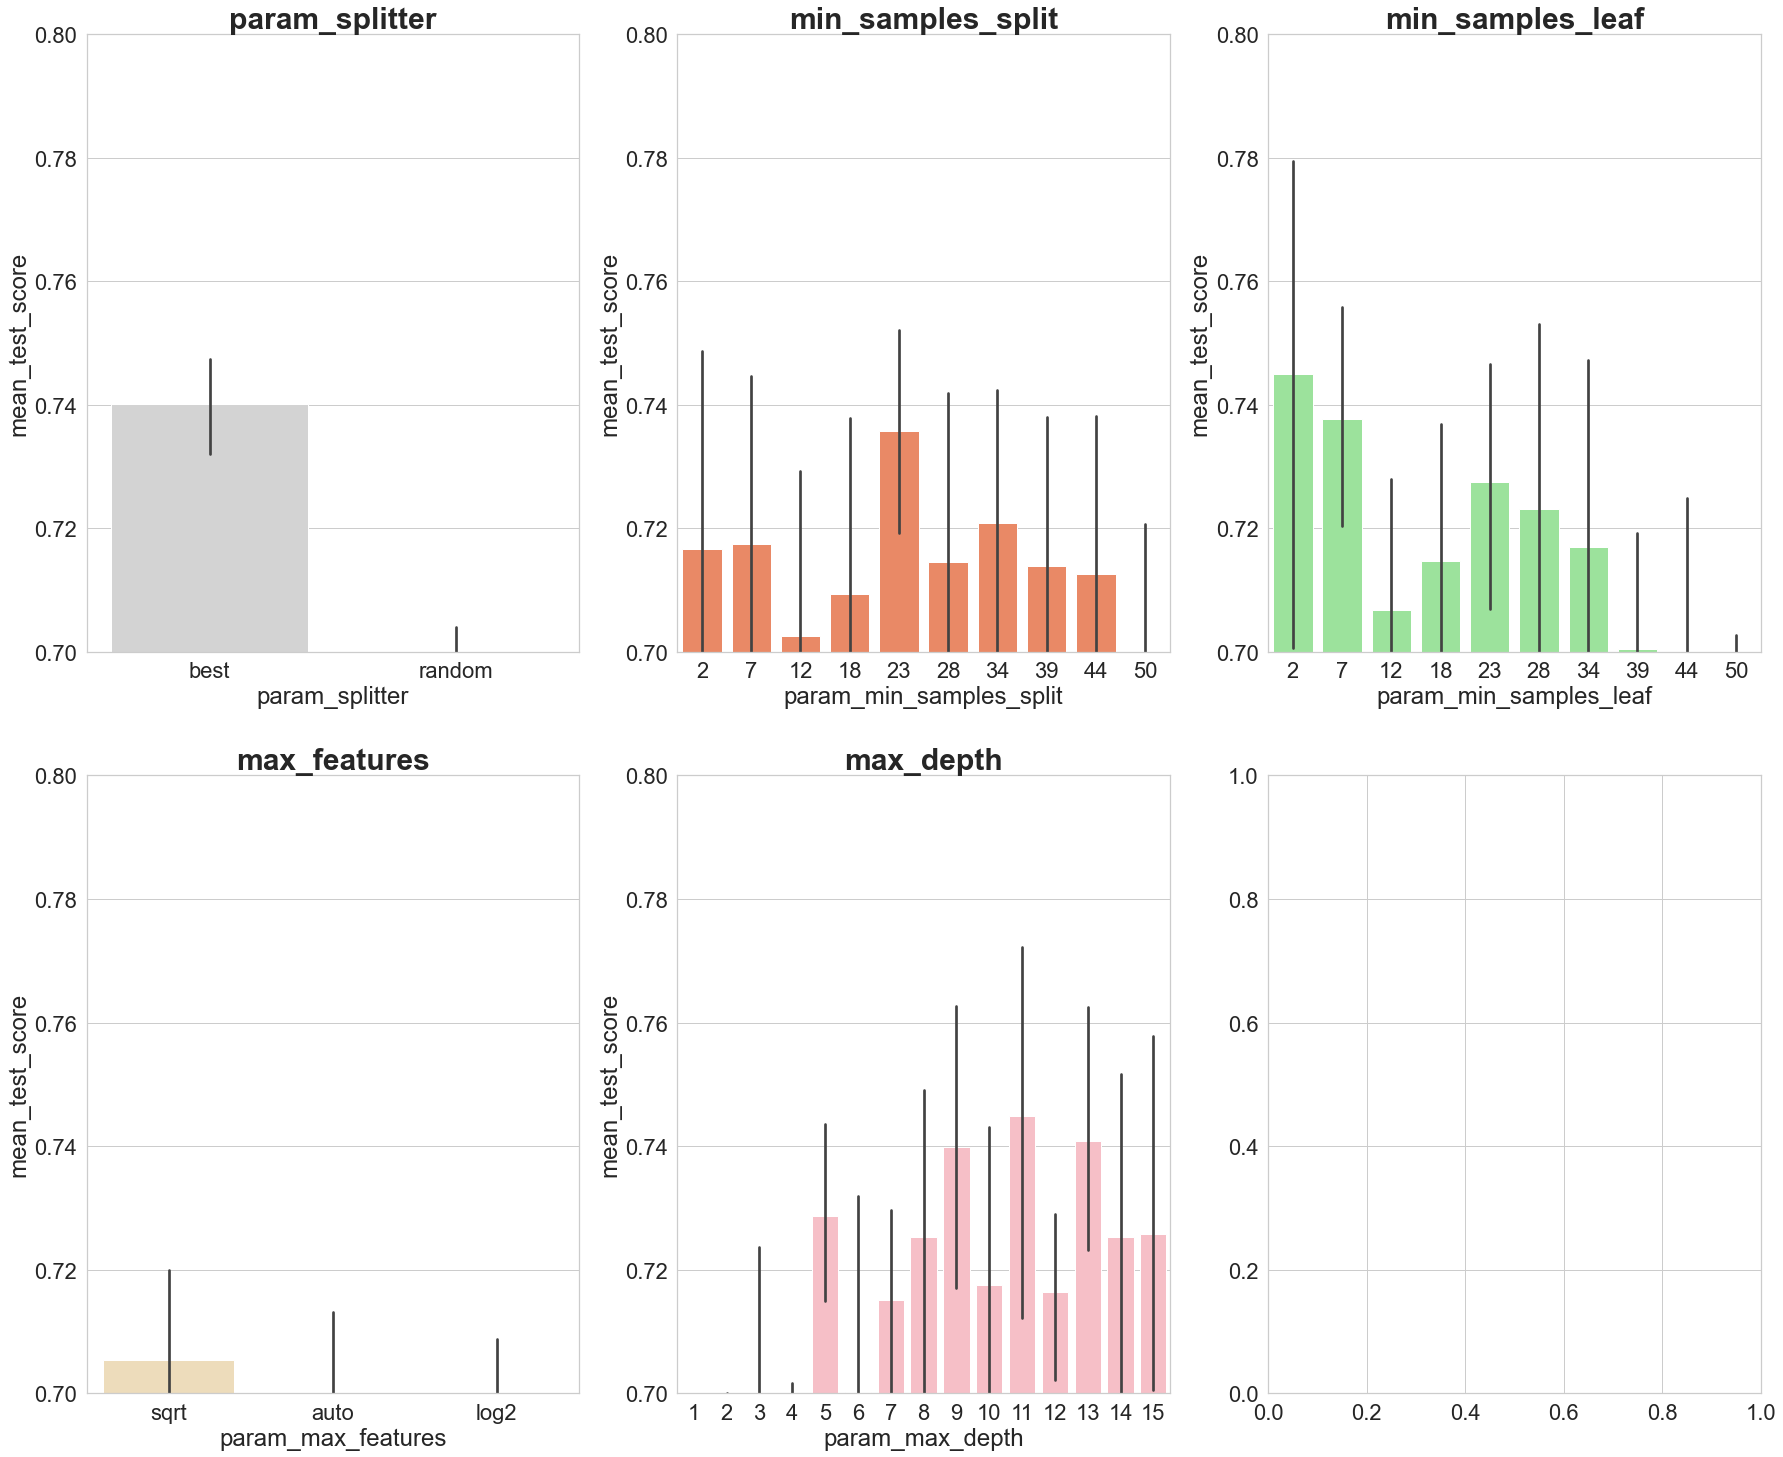

In [31]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_splitter', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.7,.8])
axs[0,0].set_title(label = 'param_splitter', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.7,.8])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.7,.8])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.7,.8])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.7,.8])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
plt.show()

In [32]:
splitter = ['best']
max_features = ['sqrt']
max_depth = [9,11,13]
min_samples_split = [22,23,24]
min_samples_leaf = [1,2,3,4,5,6]
param_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
gs = GridSearchCV(dtc, param_grid, cv = 5, verbose = 1, n_jobs=-1)
gs.fit(X_train_sm, y_train_sm)
dtc = gs.best_estimator_
gs.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


{'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 22,
 'splitter': 'best'}

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8433673469387755
Classification F1score  	: 0.840020844189682
Classification Precision 	: 0.858359957401491
Classification Recall   	: 0.8224489795918367

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7653061224489796
Classification F1score  	: 0.3551401869158879
Classification Precision 	: 0.2878787878787879
Classification Recall   	: 0.4634146341463415



<AxesSubplot:>

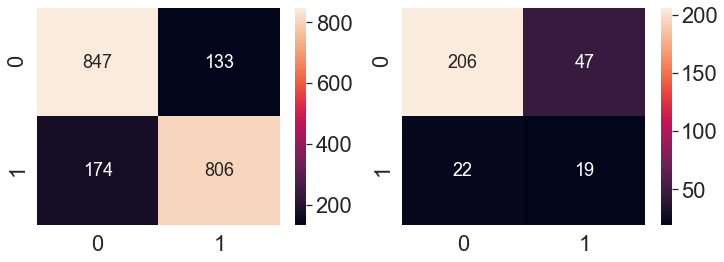

In [33]:
# Train the model
gs.best_estimator_.fit(X_train_sm, y_train_sm)

# Predict Legendary values corresponding to Total
y_train_sm_pred = gs.best_estimator_.predict(X_train_sm)
y_test_pred = gs.best_estimator_.predict(X_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_train_sm, y_train_sm_pred)
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gs.best_estimator_.score(X_train_sm, y_train_sm))
print("Classification F1score  \t:", fscore[1])
print("Classification Precision \t:", precision[1])
print("Classification Recall   \t:", recall[1])
print()

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gs.best_estimator_.score(X_test, y_test))
print("Classification F1score  \t:", fscore[1])
print("Classification Precision \t:", precision[1])
print("Classification Recall   \t:", recall[1])
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train_sm, y_train_sm_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])